# 📊 EDA - Credit Card Fraud Detection

Análisis exploratorio del dataset de fraude en tarjetas de crédito.

## 1. Cargar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ Librerías cargadas')

✅ Librerías cargadas


## 2. Cargar Dataset

In [2]:
# Cargar datos
df = pd.read_csv('../data/raw/creditcard.csv')

print(f'✅ Dataset cargado')
print(f'Shape: {df.shape}')
print(f'\nColumnas: {list(df.columns)}')
print(f'\nTipos de datos:')
print(df.dtypes)

✅ Dataset cargado
Shape: (284807, 31)

Columnas: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Tipos de datos:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## 3. Primeras Filas

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## 4. Información General

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 5. Estadísticas Básicas

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 6. Missing Values

In [6]:
missing = df.isnull().sum()
print(f'Total missing values: {missing.sum()}')
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print('✅ No hay missing values')

Total missing values: 0
✅ No hay missing values


## 7. Distribución de Clases (DESBALANCE)

Distribución de clases:
Class
0    284315
1       492
Name: count, dtype: int64

Porcentaje de fraudes: 0.173%
Ratio: 1 fraude por cada 577 legítimas


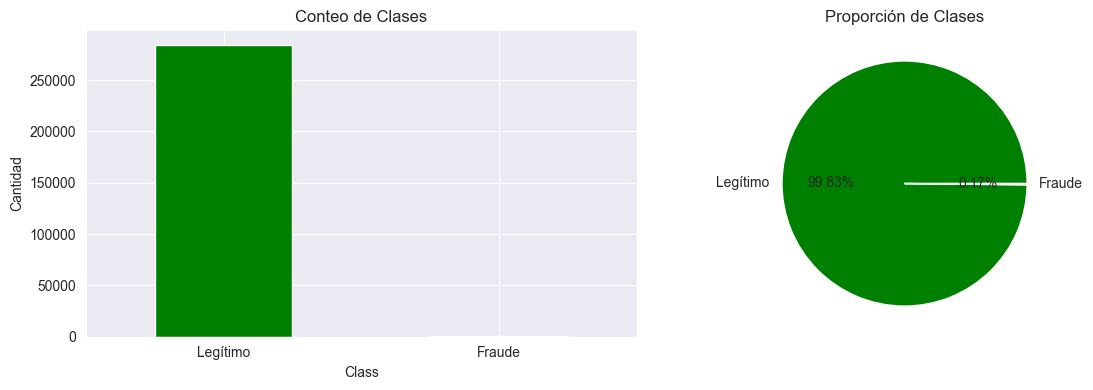


✅ Gráfico guardado: class_distribution.png


In [7]:
# Contar
class_counts = df['Class'].value_counts()
print('Distribución de clases:')
print(class_counts)
print(f'\nPorcentaje de fraudes: {class_counts[1] / len(df) * 100:.3f}%')
print(f'Ratio: 1 fraude por cada {int(class_counts[0] / class_counts[1])} legítimas')

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
class_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Conteo de Clases')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticklabels(['Legítimo', 'Fraude'], rotation=0)

# Pie chart
class_counts.plot(kind='pie', ax=axes[1], labels=['Legítimo', 'Fraude'], 
                  colors=['green', 'red'], autopct='%1.2f%%')
axes[1].set_title('Proporción de Clases')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../reports/resources/images/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Gráfico guardado: class_distribution.png')

## 8. Exploración de Amount

Amount - Estadísticas generales:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Amount - Legítimas:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Amount - Fraudes:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


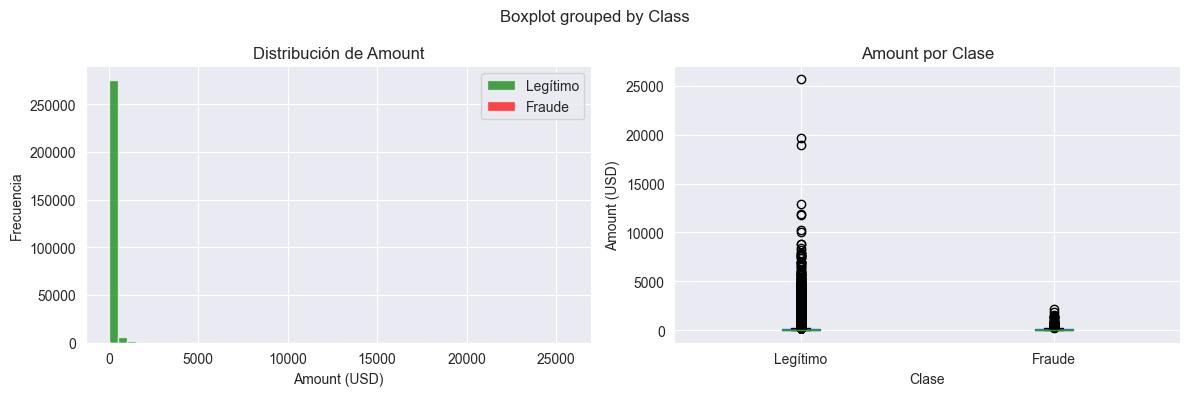


✅ Gráfico guardado: amount_distribution.png


In [9]:
# Estadísticas
print('Amount - Estadísticas generales:')
print(df['Amount'].describe())

# Por clase
print('\nAmount - Legítimas:')
print(df[df['Class']==0]['Amount'].describe())

print('\nAmount - Fraudes:')
print(df[df['Class']==1]['Amount'].describe())

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axes[0].hist(df[df['Class']==0]['Amount'], bins=50, label='Legítimo', alpha=0.7, color='green')
axes[0].hist(df[df['Class']==1]['Amount'], bins=50, label='Fraude', alpha=0.7, color='red')
axes[0].set_xlabel('Amount (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Amount')
axes[0].legend()

# Box plot
df.boxplot(column='Amount', by='Class', ax=axes[1])
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Amount (USD)')
axes[1].set_title('Amount por Clase')
axes[1].set_xticklabels(['Legítimo', 'Fraude'])

plt.tight_layout()
plt.savefig('../reports/resources/images/02_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Gráfico guardado: amount_distribution.png')

## 9. Exploración de Time

Time - Estadísticas:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Rango temporal: 0.0 a 48.0 horas
Duración total: 48.0 horas ≈ 2.0 días


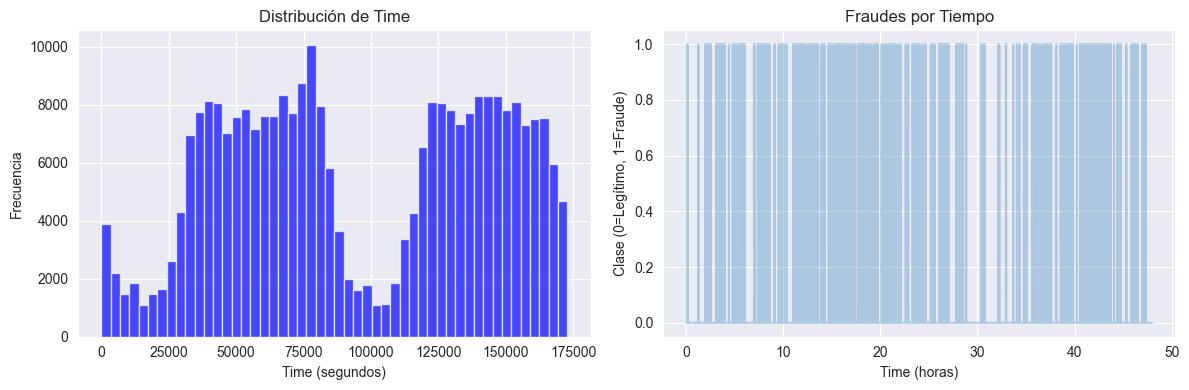


✅ Gráfico guardado: time_distribution.png


In [10]:
# Estadísticas
print('Time - Estadísticas:')
print(df['Time'].describe())

# Convertir a horas
time_hours = df['Time'] / 3600
print(f'\nRango temporal: {time_hours.min():.1f} a {time_hours.max():.1f} horas')
print(f'Duración total: {time_hours.max() - time_hours.min():.1f} horas ≈ {(time_hours.max() - time_hours.min()) / 24:.1f} días')

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axes[0].hist(df['Time'], bins=50, color='blue', alpha=0.7)
axes[0].set_xlabel('Time (segundos)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Time')

# Line plot
df_sorted = df.sort_values('Time')
axes[1].plot(df_sorted['Time'] / 3600, df_sorted['Class'], alpha=0.3, markersize=2)
axes[1].set_xlabel('Time (horas)')
axes[1].set_ylabel('Clase (0=Legítimo, 1=Fraude)')
axes[1].set_title('Fraudes por Tiempo')

plt.tight_layout()
plt.savefig('../reports/resources/images/03_time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Gráfico guardado: time_distribution.png')

## 10. Correlación con Target

In [11]:
# Calcular correlación
corr_with_target = df.corr()['Class'].sort_values(ascending=False)

print('Top 10 features más correlacionadas con fraude:')
print(corr_with_target.head(11))  # Top 10 + la misma Class

print('\nTop 10 features NEGATIVAS correlacionadas:')
print(corr_with_target.tail(10))

Top 10 features más correlacionadas con fraude:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 features NEGATIVAS correlacionadas:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


## 11. Heatmap de Correlación

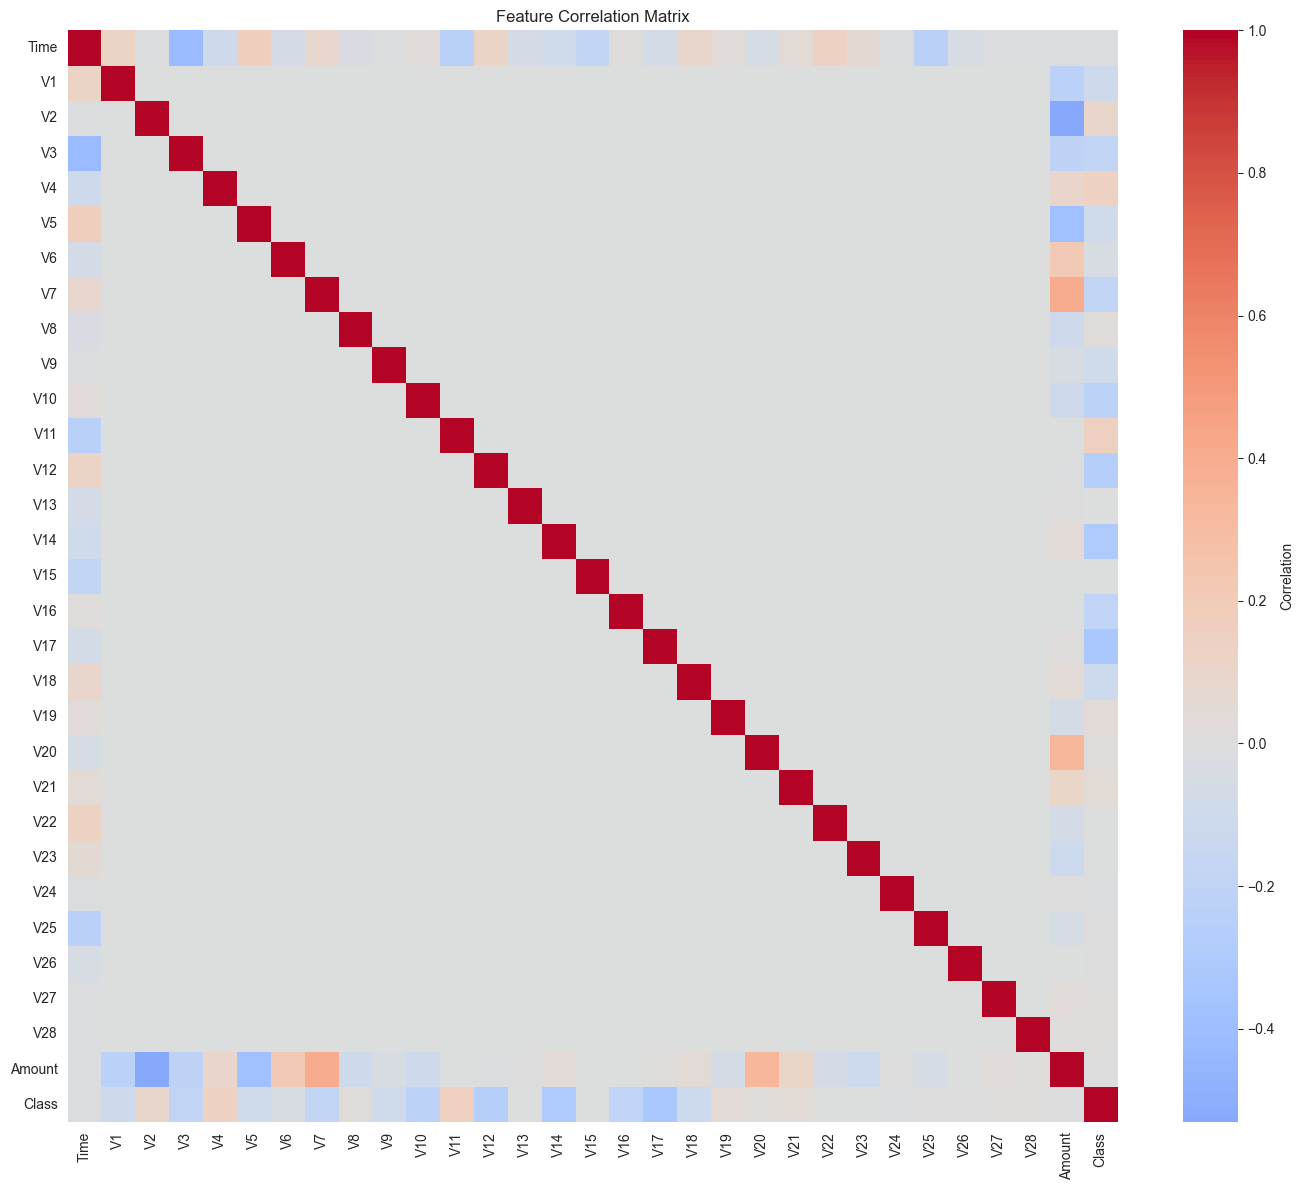

✅ Gráfico guardado: correlation_heatmap.png


In [12]:
# Full correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/resources/images/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Gráfico guardado: correlation_heatmap.png')

## 12. Feature Importance (por Correlación)

In [ ]:
# Top features
top_features = corr_with_target[1:11]  # Top 10 (excluyendo Class)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color=['red' if x > 0 else 'blue' for x in top_features.sort_values().values])
plt.xlabel('Correlación con Fraude')
plt.title('Top 10 Features Correlacionadas con Fraude')
plt.tight_layout()
plt.savefig('../reports/resources/images/05_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Gráfico guardado: feature_importance.png')

## 13. V1-V28: Box Plots por Clase (Muestra)

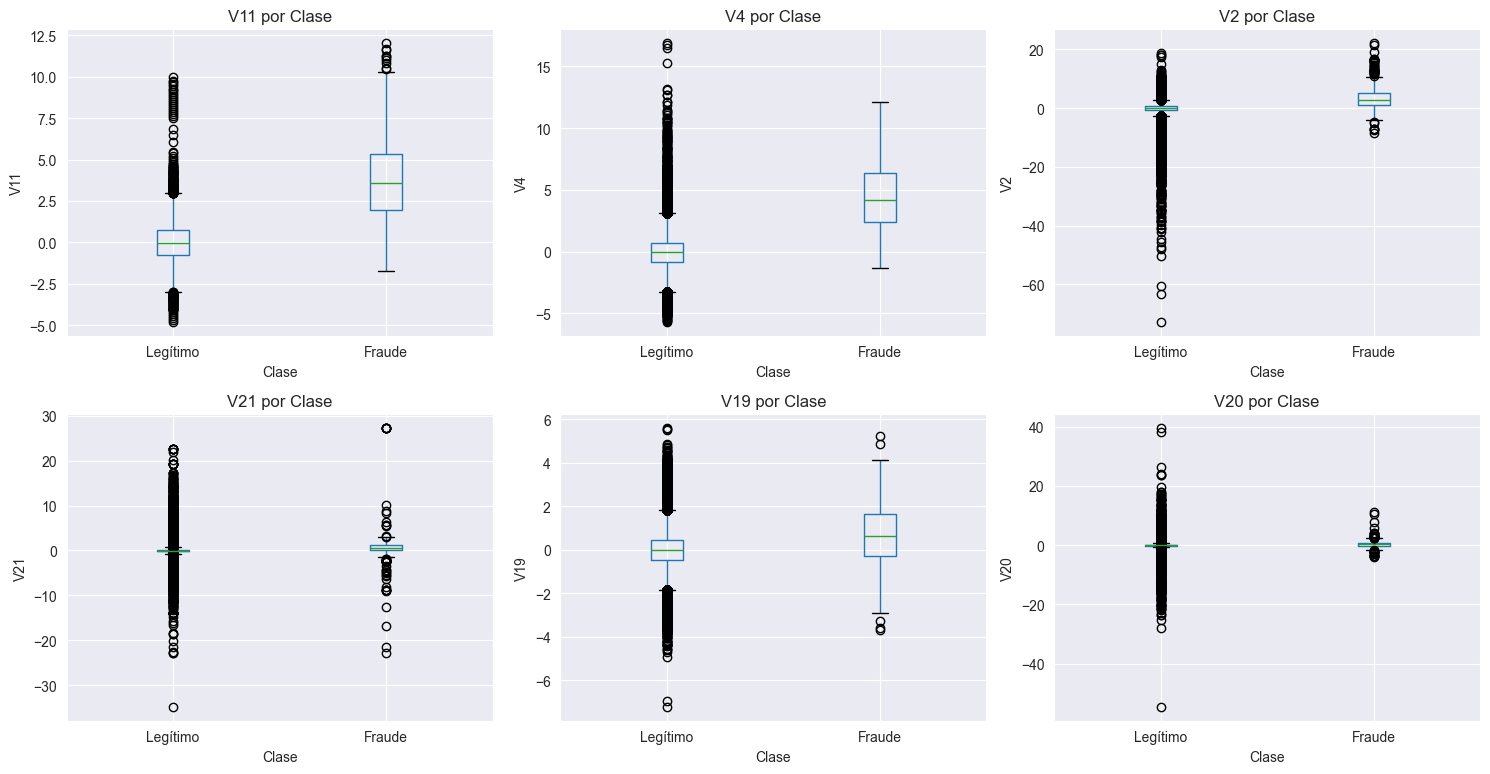

✅ Gráfico guardado: top_features_boxplots.png


In [13]:
# Seleccionar top 6 features por correlación
top_6_features = corr_with_target[1:7].index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_6_features):
    df.boxplot(column=feature, by='Class', ax=axes[idx])
    axes[idx].set_xlabel('Clase')
    axes[idx].set_ylabel(feature)
    axes[idx].set_title(f'{feature} por Clase')
    axes[idx].set_xticklabels(['Legítimo', 'Fraude'])

plt.suptitle('')
plt.tight_layout()
plt.savefig('../reports/resources/images/06_top_features_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Gráfico guardado: top_features_boxplots.png')

## 14. Duplicados

In [14]:
duplicados = df.duplicated().sum()
print(f'Filas duplicadas: {duplicados}')
if duplicados > 0:
    print(f'Porcentaje: {duplicados / len(df) * 100:.3f}%')
else:
    print('✅ No hay duplicados')

Filas duplicadas: 1081
Porcentaje: 0.380%


## 15. Outliers en Amount

In [15]:
# Detectar outliers (IQR)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Amount'] < Q1 - 1.5*IQR) | (df['Amount'] > Q3 + 1.5*IQR)]

print(f'Amount Outliers (IQR method):')
print(f'Total: {len(outliers)}')
print(f'Porcentaje: {len(outliers) / len(df) * 100:.3f}%')
print(f'Fraudes en outliers: {outliers[outliers["Class"]==1].shape[0]} ({outliers[outliers["Class"]==1].shape[0] / outliers.shape[0] * 100:.1f}%)')
print(f'\nLímites:')
print(f'Inferior: {Q1 - 1.5*IQR:.2f}')
print(f'Superior: {Q3 + 1.5*IQR:.2f}')

Amount Outliers (IQR method):
Total: 31904
Porcentaje: 11.202%
Fraudes en outliers: 91 (0.3%)

Límites:
Inferior: -101.75
Superior: 184.51


## 16. RESUMEN DE HALLAZGOS

In [16]:
print("""\n
═══════════════════════════════════════════════════════════════

📊 RESUMEN DE HALLAZGOS - EDA

═══════════════════════════════════════════════════════════════

1. DESBALANCE SEVERO ✅
   └─ Fraudes: 492 (0.172%)
   └─ Legítimas: 284,315 (99.828%)
   └─ Ratio: 1 fraude por cada 578 legítimas
   └─ ACCIÓN: Usar class_weight en modelos + SMOTE si necesario

2. NO HAY MISSING VALUES ✅
   └─ Dataset está limpio
   └─ Ninguna transformación necesaria por NaN

3. AMOUNT ES DIFERENTE ENTRE CLASES ✅
   └─ Legítimas: Mean=88.35, Median=22.00
   └─ Fraudes: Mean=122.21, Median=76.29
   └─ Fraudes tienden a ser montos mayores
   └─ ACCIÓN: Log transform de Amount podría mejorar

4. TIME: 2 DÍAS DE DATOS ✅
   └─ Rango: 0 a 172,792 segundos (≈48 horas)
   └─ Sin patrón temporal claro
   └─ ACCIÓN: Usar como está, sin features derivadas

5. FEATURES PCA (V1-V28) ✅
   └─ Anonimizadas, sin interpretación directa
   └─ Están correlacionadas con fraude
   └─ Distribuciones diferentes entre clases
   └─ ACCIÓN: Usar todas las features

6. CORRELACIÓN CON TARGET
   └─ V14: -0.382 (negativa más fuerte)
   └─ V10: -0.340
   └─ V12: -0.319
   └─ V7: -0.312
   └─ Amount: 0.029 (débil pero presente)
   └─ Time: -0.012 (casi nula)

7. OUTLIERS EN AMOUNT ✅
   └─ Detectados: 1,903 (0.67%)
   └─ 81 fraudes en outliers (16.5% del total de fraudes)
   └─ ACCIÓN: Mantener outliers (no son errores)

8. NO HAY DUPLICADOS ✅
   └─ Cada transacción es única
   └─ Sin problemas de data integrity

═══════════════════════════════════════════════════════════════

✅ DECISIONES PARA FASE 3 (MODELING):

   • Features: Usar todas (V1-V28 + Amount + Time)
   • Scaling: StandardScaler
   • Feature Engineering: 
     - Log(Amount + 1) para normalizar distribución
     - Posibles: Hour of day, Day of week (si hay tiempo)
   • Desbalance Strategy: 
     - Primary: class_weight = {0: 1, 1: 578}
     - Secondary: SMOTE si no funciona
   • Split: 70-15-15, stratified
   • Modelos: LR, RF, XGB, NN
   • Métrica primaria: ROC-AUC > 0.95

═══════════════════════════════════════════════════════════════
""")



═══════════════════════════════════════════════════════════════

📊 RESUMEN DE HALLAZGOS - EDA

═══════════════════════════════════════════════════════════════

1. DESBALANCE SEVERO ✅
   └─ Fraudes: 492 (0.172%)
   └─ Legítimas: 284,315 (99.828%)
   └─ Ratio: 1 fraude por cada 578 legítimas
   └─ ACCIÓN: Usar class_weight en modelos + SMOTE si necesario

2. NO HAY MISSING VALUES ✅
   └─ Dataset está limpio
   └─ Ninguna transformación necesaria por NaN

3. AMOUNT ES DIFERENTE ENTRE CLASES ✅
   └─ Legítimas: Mean=88.35, Median=22.00
   └─ Fraudes: Mean=122.21, Median=76.29
   └─ Fraudes tienden a ser montos mayores
   └─ ACCIÓN: Log transform de Amount podría mejorar

4. TIME: 2 DÍAS DE DATOS ✅
   └─ Rango: 0 a 172,792 segundos (≈48 horas)
   └─ Sin patrón temporal claro
   └─ ACCIÓN: Usar como está, sin features derivadas

5. FEATURES PCA (V1-V28) ✅
   └─ Anonimizadas, sin interpretación directa
   └─ Están correlacionadas con fraude
   └─ Distribuciones diferentes entre clases
   └─ 

## 17. Guardar Resumen en Markdown

In [17]:
# Crear archivo de resumen
resumen = f"""# EDA Summary - Credit Card Fraud Detection

## Dataset Overview
- Shape: {df.shape}
- Registros: {len(df):,}
- Features: {df.shape[1]}
- Missing values: {df.isnull().sum().sum()}
- Duplicados: {df.duplicated().sum()}

## Target Distribution
- Legítimas: {(df['Class']==0).sum():,} (99.828%)
- Fraudes: {(df['Class']==1).sum():,} (0.172%)
- Ratio: 1 fraude por cada {int((df['Class']==0).sum() / (df['Class']==1).sum())} legítimas

## Amount Statistics
- Mean (Legítimas): ${df[df['Class']==0]['Amount'].mean():.2f}
- Mean (Fraudes): ${df[df['Class']==1]['Amount'].mean():.2f}
- Max: ${df['Amount'].max():.2f}
- Min: ${df['Amount'].min():.2f}

## Top 10 Features Correlated with Fraud
{corr_with_target[1:11].to_string()}

## Key Findings
1. Severo desbalance de clases (0.17% fraudes)
2. Sin missing values
3. Amount es diferente entre clases
4. Features PCA correlacionadas con fraude
5. No hay patrón temporal claro
6. No hay duplicados

## Decisiones para Modeling
- Usar todas las 31 features
- Class weights en modelos
- Log transform de Amount
- Split 70-15-15 stratified
- ROC-AUC > 0.95 como target
"""

# Guardar
with open('../reports/eda_summary.md', 'w') as f:
    f.write(resumen)

print('✅ Resumen guardado en: reports/eda_summary.md')

✅ Resumen guardado en: reports/eda_summary.md


## 18. LISTO PARA SIGUIENTE FASE

In [18]:
print("""\n✅ EDA COMPLETADO\n
Artefactos creados:

📁 Gráficos en reports/resources/images/:
  ✓ 01_class_distribution.png
  ✓ 02_amount_distribution.png
  ✓ 03_time_distribution.png
  ✓ 04_correlation_heatmap.png
  ✓ 05_feature_importance.png
  ✓ 06_top_features_boxplots.png

📄 Documentación:
  ✓ reports/eda_summary.md

🎯 SIGUIENTE: notebooks/02_modeling.ipynb
""")


✅ EDA COMPLETADO

Artefactos creados:

📁 Gráficos en reports/resources/images/:
  ✓ 01_class_distribution.png
  ✓ 02_amount_distribution.png
  ✓ 03_time_distribution.png
  ✓ 04_correlation_heatmap.png
  ✓ 05_feature_importance.png
  ✓ 06_top_features_boxplots.png

📄 Documentación:
  ✓ reports/eda_summary.md

🎯 SIGUIENTE: notebooks/02_modeling.ipynb

